In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [78]:
im = cv2.imread("effects/example1.png", -1)

In [93]:
mask = (im == [0,0,0,0]).all(axis=2)
im[mask] = [255, 255, 255, 0]

In [81]:
imHeight, imWidth = im.shape[0], im.shape[1]
centreX, centreY = imWidth//2, imHeight//2
centreY, centreX

(561, 1532)

In [82]:
rotationMat = cv2.getRotationMatrix2D(
    center=(centreX, centreY),
    angle=5,
    scale=1
)
rotationMat

array([[ 9.96194698e-01,  8.71557427e-02, -4.30646492e+01],
       [-8.71557427e-02,  9.96194698e-01,  1.35657372e+02]])

In [83]:
cos = np.abs(rotationMat[0][0])
sin = np.abs(rotationMat[1][0])
cos, sin

(0.9961946980917455, 0.08715574274765817)

In [84]:
newWidth = int((imHeight * sin) + (imWidth * cos))
newHeight = int((imHeight * cos) + (imWidth * sin))
newHeight, newWidth, im.shape

(1385, 3150, (1123, 3064, 4))

In [85]:
rotationMat[0][2] = 0
rotationMat[1][2] += newHeight/2 - centreY
rotationMat

array([[ 9.96194698e-01,  8.71557427e-02,  0.00000000e+00],
       [-8.71557427e-02,  9.96194698e-01,  2.67157372e+02]])

In [86]:
dst_mat = np.zeros((newHeight, newWidth, 4), np.uint8)
dst_mat = np.full((newHeight, newWidth, 4), [255, 255, 255, 0])
rotatedMat = cv2.warpAffine(
    im,
    rotationMat,
    (newWidth, newHeight),
    np.ascontiguousarray(dst_mat, np.uint8),
    borderMode = cv2.BORDER_TRANSPARENT
)

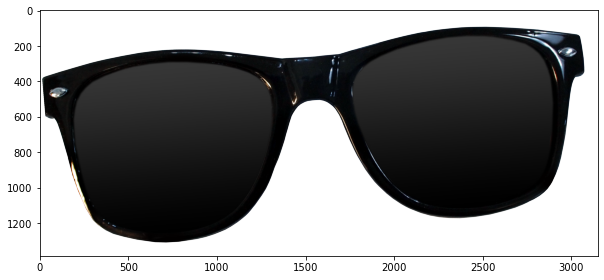

In [87]:
plt.figure(figsize=(10, 10))
plt.imshow(rotatedMat)

In [88]:
cv2.imshow("im", rotatedMat)
if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55d2a3fe4c80) is not the object's thread (0x55d2a6586c90).
Cannot move to target thread (0x55d2a3fe4c80)

QObject::moveToThread: Current thread (0x55d2a3fe4c80) is not the object's thread (0x55d2a6586c90).
Cannot move to target thread (0x55d2a3fe4c80)

QObject::moveToThread: Current thread (0x55d2a3fe4c80) is not the object's thread (0x55d2a6586c90).
Cannot move to target thread (0x55d2a3fe4c80)

QObject::moveToThread: Current thread (0x55d2a3fe4c80) is not the object's thread (0x55d2a6586c90).
Cannot move to target thread (0x55d2a3fe4c80)

QObject::moveToThread: Current thread (0x55d2a3fe4c80) is not the object's thread (0x55d2a6586c90).
Cannot move to target thread (0x55d2a3fe4c80)

QObject::moveToThread: Current thread (0x55d2a3fe4c80) is not the object's thread (0x55d2a6586c90).
Cannot move to target thread (0x55d2a3fe4c80)

QObject::moveToThread: Current thread (0x55d2a3fe4c80) is not the object's thread (0x55d2a6586c90).
Cannot move to tar

In [89]:
cv2.imwrite("images/test_file.png", rotatedMat)

True